
Data resource: datasets containing listing and reviews in **Los Angeles** from (insidearibnb.com)[http://insideairbnb.com/get-the-data.html]. 

In [1]:
import pandas as pd

#read the csv data
df_listing = pd.read_csv("./listings.csv")
df_reviews = pd.read_csv("./reviews.csv")

#count the unique number of listing and host within the dataset "df_listing"
unique_listing = df_listing["id"].nunique()
unique_host = df_listing["host_id"].nunique()

#print out the answers of the questiong
print("Number of unique listings is %d" %unique_listing)print("Number of unique hosts is %d" %unique_host)

Number of unique listings is 43763
Number of unique listings is 26730




* The mean of the listing number is 1.637224.
* The median of the listing number is 1.
* The standard deviation of the listing number is 2.497282.
* The minimum of the listing number is 1.
* The maximum of the listing number is 152.


In [2]:
# group by 'host_id', then count how many listings each host has, finally to calculate each host's mean, standard deviation, minimum and maximum
df_listing.groupby(by='host_id').\
apply(lambda x:pd.Series({'count':x['id'].nunique()})).\
sort_values(by='count',ascending=False)['count'].describe()

count    26730.000000
mean         1.637224
std          2.497282
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        152.000000
Name: count, dtype: float64


* The average number listings for a super host is 2.158738024446647.
* The average number listings for a non-super host is 5.893773757056974.
* The std number listings for a super host is 2.1595178156467854.
* The std number listings for a non-super host is 15.213995819214025.
* The difference average number between super host and non-super host is -0.00077979120013838, which means super host would have more listings on average.

In [3]:
#extract columns('host_is_superhost','host_id','host_listings_count') to form a new data frame for hosts that are superhosts
df_t=df_listing.loc[df_listing['host_is_superhost']=='t',:][['host_is_superhost','host_id','host_listings_count']]

#create a data frame that each host corresponds its total number of listings(hosts are superhosts)
dft=df_t.groupby(by='host_id').apply(lambda x:pd.Series({'listing_count':x['host_listings_count'].mean()}))

#extract columns('host_is_superhost','host_id','host_listings_count') to form a new data frame for hosts that are NOT superhosts
df_f=df_listing.loc[df_listing['host_is_superhost']=='f',:][['host_is_superhost','host_id','host_listings_count']]

#create a data frame that each host corresponds its total number of listings(hosts are NOT superhosts)
dff=df_f.groupby(by='host_id').apply(lambda x:pd.Series({'listing_count':x['host_listings_count'].mean()}))


In [4]:
# calculate mean, standard deviation of the number of listings for a superhost and a non-superhost
is_superhost_mean = dft['listing_count'].mean()
is_superhost_std =dft['listing_count'].std()

not_superhost_mean = dff['listing_count'].mean()
not_superhost_std = dff['listing_count'].std()

print(is_superhost_mean,is_superhost_std,not_superhost_mean,not_superhost_std)

# calculate the difference between the mean of a superhost and non-superhost, which could provide us a idea of which host has more listings on average
diff_mean = is_superhost_mean - not_superhost_mean
print(diff_mean)

2.158738024446647 5.893773757056974 2.1595178156467854 15.213995819214025
-0.00077979120013838



* There are 22 unique types of host verifications. 
* The vertification types are: 'email', 'phone', 'reviews', 'jumio', 'government_id', 'facebook', 'kba', 'work_email', 'offline_government_id', 'manual_online', 'selfie', 'identity_manual', 'google', 'manual_offline', '', 'sent_id', 'photographer', 'zhima_selfie', 'None', 'weibo', 'sesame', 'sesame_offline'

In [5]:
df_group=df_listing.groupby(by='host_id').\
            apply(lambda x:pd.Series({'verification':x['host_verifications'].unique()}))


In [6]:
# You need to provide the code to answer the previous quesiton
b={} # create a dictionary to help counting the times for each verification types
for index,row in df_group.iterrows():
    host_verifications = str(row['verification'])
    d = host_verifications.replace('[','').replace(']','').replace("'","").replace(' ','').replace('"','') 
    l=d.split(',')
  
    for i in l:
        if i not in b.keys():
            b[i] = 1
        else:
            b[i] = b[i] +1
print(b)
len(b)

{'email': 25003, 'phone': 26563, 'reviews': 19841, 'jumio': 12075, 'government_id': 12429, 'facebook': 6341, 'kba': 7036, 'work_email': 3571, 'offline_government_id': 6947, 'manual_online': 147, 'selfie': 3736, 'identity_manual': 3553, 'google': 1706, 'manual_offline': 275, '': 13, 'sent_id': 30, 'photographer': 4, 'zhima_selfie': 46, 'None': 20, 'weibo': 41, 'sesame': 14, 'sesame_offline': 14}


22


* The five most popylar verificaition types of hosts are email, phone, email, reviews, government_id, jumio.
* For each of the top five verifications, the percentage of phone is 99.37523381967827, the percentage of email is 93.53909465020575, the percentage of reviews is 74.22745978301533, the percentage of government_id is 46.4983164983165, and the percentage of jumio is 45.17396184062851.

In [7]:
# You need to provide the code to answer the previous quesiton
b_sorted = sorted(b.items(),key=lambda item:item[1],reverse=True)

b_top_five = b_sorted[:5]

print(b_top_five)
top_five_dict = {}
for x in b_top_five:
    top_five_dict[x[0]] = x[1]

top_five_dict.keys() #The five most popylar verificaition types of hosts


percent_top_five = [] #The percentage of the top five popular verification type
for j in top_five_dict.values():
    percent_top_five.append((j/unique_host)*100)

percent_top_five

[('phone', 26563), ('email', 25003), ('reviews', 19841), ('government_id', 12429), ('jumio', 12075)]


[99.37523381967827,
 93.53909465020575,
 74.22745978301533,
 46.4983164983165,
 45.17396184062851]


* The average price of a listing in LA from Jan 1st,2019 to Mar 1st,2019 is 213.2409167657559.
* The std of a listing in LA from Jan 1st,2019 to Mar 1st,2019 is 577.3961352033027.

In [8]:
df_calendar = pd.read_csv("./calendar.csv") 
df_calendar["date"] = pd.to_datetime(df_calendar["date"])

# convert entries of price column into floats
df_calendar['price']=df_calendar.price.astype('str').\
                    apply(lambda x:float(x.strip('$').replace(",","")))

,listing_id,date,available,price
0,109,2019-08-08,t,127.0
1,72186,2019-10-04,t,52.0
2,72186,2019-10-03,t,52.0
3,72186,2019-10-02,t,52.0
4,72186,2019-10-01,t,52.0


In [38]:
# select the period of time needed
period = (df_calendar['date'] >= "2019-01-01") & (df_calendar['date'] <= "2019-03-01") & (df_calendar['available'] == "t")
df_6 = df_calendar.loc[period]
df_6 = df_6.dropna(axis=0,how='any',subset=["price"])
# calculate the average price of a listing in LA during the period of time
df6 = df_6.groupby(by=["listing_id"]).apply(lambda x:pd.Series({"listing_avg":x["price"].mean()}))
# calcualte the median and standard deviation of the df6
avg_period = df6["listing_avg"].mean()
std_period = df6["listing_avg"].std()
print(avg_period,std_period)

213.2409167657559 577.3961352033027



* The most popular ten words in Jan, 2016:('great', 6748),('stay', 5738),('place', 5379),('location', 3400),('clean', 3323),('house', 3291),('us', 3219),('would', 3067),('host', 2972),('nice', 2942)
* The most popular ten words in Mar, 2017:('great', 15695),('place', 14688),('stay', 11920),('location', 7584),('clean', 6956)('would', 5935),('nice', 5851),('host', 5794),('house', 4852),('comfortable', 4761)
* The most popular ten words in Apr, 2018:('great', 25292),('place', 24889),('stay', 19524),('location', 13657),('clean', 12075),('would', 9979),('host', 9365),('nice', 9146),('house', 7120),('everything', 6987)

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/peiyilinshen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/peiyilinshen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:

def count_words(period1):
    """create a function to count the number of the words besides the stopping words,punctuation and numbers."""
    df_reviews_7 = df_reviews.loc[period1]
    words={} # create a dictionary to help counting the times for each verification types
    for index,row in df_reviews_7.iterrows():
        comments = row['comments']
        
        comments = str(comments)
        word_tokens = word_tokenize(comments)
        d = [word.lower() for word in word_tokens if word.isalpha()]
        word_temp = [w for w in d if not w in stop_words]
        
        for i in word_temp:    
            if i not in words.keys():
                words[i] = 1
            else:
                words[i] = words[i] +1
    
    return words

In [12]:
# Count the top-ten-popular-word's numbers during the period 2016-01-01 to 2016-01-31
period1 = (df_reviews['date'] >= "2016-01-01") & (df_reviews['date'] <= "2016-01-31")
words = count_words(period1)
# words
words_sorted = sorted(words.items(),key=lambda item:item[1],reverse=True)
words_top_ten = words_sorted[0:10]
words_top_ten

[('great', 6748),
 ('stay', 5738),
 ('place', 5379),
 ('location', 3400),
 ('clean', 3323),
 ('house', 3291),
 ('us', 3219),
 ('would', 3067),
 ('host', 2972),
 ('nice', 2942)]

In [13]:
# Count the top-ten-popular-word's numbers during the period 2017-03-01 to 2017-03-31
period2 = (df_reviews['date'] >= "2017-03-01") & (df_reviews['date'] <= "2017-03-31")
words = count_words(period2)
# words
words_sorted = sorted(words.items(),key=lambda item:item[1],reverse=True)
words_top_ten = words_sorted[0:10]
words_top_ten

[('great', 15695),
 ('place', 14688),
 ('stay', 11920),
 ('location', 7584),
 ('clean', 6956),
 ('would', 5935),
 ('nice', 5851),
 ('host', 5794),
 ('house', 4852),
 ('comfortable', 4761)]

In [14]:
# Count the top-ten-popular-word's numbers during the period 2018-04-01 to 2018-04-30
period3 = (df_reviews['date'] >= "2018-04-01") & (df_reviews['date'] <= "2018-04-30")
words = count_words(period3)
# words
words_sorted = sorted(words.items(),key=lambda item:item[1],reverse=True)
words_top_ten = words_sorted[0:10]
words_top_ten

[('great', 25292),
 ('place', 24889),
 ('stay', 19524),
 ('location', 13657),
 ('clean', 12075),
 ('would', 9979),
 ('host', 9365),
 ('nice', 9146),
 ('house', 7120),
 ('everything', 6987)]


* The five zipcodes which have the highest average listing price between between 2019-01-01 to 2019-02-01 are 90210,90265,90069,90077,91436. And the listing prices respectively are 1440.587339,1119.410276,776.265778,740.833933,541.754558.
* The number of active listings and hosts of the top five zipcodes(90210,90265,90069,90077,91436): The active listings numbers are 297,473,529,66,64 and the active hosts numbers are 209,320,380,56,51.


In [15]:
import numpy as np

# merge certain columns of df_listing with df_calendar by left join
df=df_listing[['id','zipcode','host_id']].\
    merge(df_calendar,how='left',left_on='id',right_on='listing_id')

# create data frame from 2019-01-01 to 2019-02-01 and filter data with zipcode that has less than 30 listings
df_period=df.loc[(df['date']>='2019-01-01')&(df['date']<='2019-02-01'),:].\
          groupby(by='zipcode').filter(lambda x:x['id'].nunique()>=30)

# create data frame that each zipcode has corresponding average listing price, then sort the data frame by average listing price descendingly
df_top=df_period.groupby(by='zipcode').\
        apply(lambda x:pd.Series({'ave_price':x['price'].agg(np.mean)})).\
sort_values(by='ave_price',ascending=False)

#get the top five zipcode with the largest average price
df_top.head()

,ave_price
zipcode,
90210,1440.587339
90265,1119.410276
90069,776.265778
90077,740.833933
91436,541.754558


In [16]:
# create a data frame that each listing has corresponding answer(0=not active,1=active) 
df_calendar_new=df_period.groupby(by='listing_id').\
        apply(lambda x:pd.Series({'is_active':1 if sum(x['available']=='t')>=1 else 0}))

# merge certain columns of df_listing with df_calendar_new
df2=df_listing[['id','zipcode','host_id']].\
    merge(df_calendar_new,how='left',left_on='id',right_on='listing_id')

# calculate the number of host_id
d=df2.loc[df2['is_active']==1,:]
df_host=d.groupby(by='zipcode').apply(lambda x:pd.Series({'host':x['host_id'].nunique()}))

# calculate the number of active listings
df_active=df2.groupby(by='zipcode').\
            apply(lambda x:pd.Series({'num_active':sum(x['is_active'])}))

In [17]:
# put all related data into one data frame to get the top five zipcode's number of active listings, hosts, and average price
df_final=df_top.merge(df_active,how='inner',on='zipcode').merge(df_host,how='inner',on='zipcode')
df_final.head()

,ave_price,num_active,host
zipcode,,,
90210,1440.587339,297.0,209
90265,1119.410276,473.0,320
90069,776.265778,529.0,380
90077,740.833933,66.0,56
91436,541.754558,64.0,51




* zipcodes: 90210,90069,91302,91325,90211
* the absolute difference: 17.966450,15.566193,15.282956,12.948061,8.634384



In [24]:
# You need to provide the code to answer the previous quesiton
# create a list of weekdays
Weekday=['Monday','Tuesday','Wednesday','Thursday','Friday']

# create data frame from 2019-01-01 to 2019-04-01 and filter out data that the zipcode has less than 30 listings
df_period=df.loc[(df['date']>='2019-01-01')&(df['date']<='2019-04-01'),:].\
          groupby(by='zipcode').filter(lambda x:x['id'].nunique()>=30)

# create a new column that corresponds that if the date is a weekday or not
df_period['weekdays']=df_period.date.apply(lambda x:1 if x.weekday_name in Weekday else 0)

# split df_period into non-weekday data frame and weekday data frame by weekday column
d1=df_period.loc[df_period['weekdays']==1]
d0=df_period.loc[df_period['weekdays']==0]

# create data frame that each zipcode has corresponding average price based on the weekday data frame
df_weekday=d0.groupby(by=['zipcode']).\
           apply(lambda x:pd.Series({'weekend_ave_price':x['price'].mean()}))

# create data frame that each zipcode has corresponding average price based on the weekend data frame
df_weekend=d1.groupby(by='zipcode').apply(lambda x:pd.Series({'weekday_ave_price':x['price'].mean()}))

# merge df_weekday with df_weekend by inner join on zipcode
d=df_weekday.merge(df_weekend,how='inner',on='zipcode').reset_index()

# create a difference column on merged data frame through calculating the difference between the average prices of weekday and weekend
d['diff']=d.apply(lambda x:abs(x['weekday_ave_price']-x['weekend_ave_price']),axis=1)

# descendingly sort the merged data frame by the difference column to get the top five zipcode with the largest difference of average price between weekday and weekend
d.sort_values(by='diff',ascending=False).head()



/Users/peiyilinshen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  if __name__ == '__main__':


,zipcode,weekend_ave_price,weekday_ave_price,diff
54,90210,1480.384062,1462.417611,17.966450
51,90069,783.689410,768.123217,15.566193
131,91302,344.258667,359.541622,15.282956
139,91325,223.138075,210.190014,12.948061
55,90211,251.970732,243.336347,8.634384



* The average and standard deviation of the daily total capcity:51105.83516483517, 1387.1753415062674
* The average and standard deviation of the daily price per bed:105.84720649752913, 2.315225438697783

In [25]:
# provide the data set with the available capacity from 2019-01-01 to 2019-04-01.
df_listing_bed = df_listing.loc[:,["id","beds"]]
df_10 = df_calendar.merge(df_listing_bed,how="left",left_on="listing_id",right_on="id")
df_10["date"] = pd.to_datetime(df_10["date"])
period_10 = (df_10['date'] >= "2019-01-01") & (df_10['date'] <= "2019-04-01")
df_10_period = df_10.loc[period_10]
df_10_period_a = df_10_period[df_10_period["available"].isin(["t"])]
df_10_period_a = df_10_period_a.fillna(0)

In [26]:
# the average and standard deviation of the total daily capacity.
df_group_by_day = df_10_period_a.groupby(by=["date"]).apply(lambda x:pd.Series({"sum":x["beds"].sum(),\
                                                                               "mean":x["beds"].mean(),\
                                                                               "std":x["beds"].std()}))
print(df_group_by_day["sum"].mean(),df_group_by_day["sum"].std())

51105.83516483517 1387.1753415062674


In [27]:
# the average and standard deviation of the daily price per bed.
k = df_10_period_a.loc[df_10_period_a["beds"] >= 1,:]
k["price_per_bed"] = k["price"]/k["beds"]

df_price_per_day = k.groupby(by=["date"]).apply(lambda x:pd.Series({"sum":x["price_per_bed"].sum(),\
                                                                   "mean":x["price_per_bed"].mean(),\
                                                                   "std":x["price_per_bed"].std()}))

print(df_price_per_day["mean"].mean(),df_price_per_day["mean"].std())

/Users/peiyilinshen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


105.84720649752913 2.315225438697783


### Which property types of Airbnb are the top ten popular in LA? What are the average price of these property types in LA?
**Question 1 Answer:**

* Ten popular property types(from the most to the least): Apartment,House,Condo,Guesthouse,Townhouse,Guest Suite,Bungalow,Loft,Villa,Hostel
* Average price(Start with the most popular property type):166.523779,287.506441,216.018439,124.773348,164.889883,113.514504,166.418576,198.811258,1168.252623,61.93357

In [28]:
# Your code to answer Question 1
df_listing = pd.read_csv("./listings.csv")
# merge certain columns of df_listing and certain columns of df_calendar
df_type=df_listing[['id','property_type']].merge(df_calendar[['listing_id','price']], how='left',left_on='id',right_on='listing_id')

# create data frame that each property type has corresponding average price based on the merged data frame
df_tprice=df_type.groupby(by='property_type').apply(lambda x:pd.Series({'ave_price':x['price'].mean()}))

# create a sorted data frame that each property type has corresponding number of listings, descendingly sorting by the number of listings=count 
df_type_num=df_listing.groupby(by='property_type').\
            apply(lambda x:pd.Series({'count':x['id'].nunique()})).sort_values(by='count',ascending=False)

# merge df_type_num with df_tprice by left join on property type to see both the number of listings and average price for each property type
df_type_price=df_type_num.merge(df_tprice,how='left',on='property_type')

# show the top ten popular property type with corresponding average price in LA
df_type_price.head(10)

,count,ave_price
property_type,,
Apartment,16780,166.523779
House,14769,287.506441
Condominium,2286,216.018439
Guesthouse,2103,124.773348
Townhouse,1417,164.889883
Guest suite,1293,113.514504
Bungalow,1230,166.418576
Loft,982,198.811258
Villa,782,1168.252623


In [29]:
# import the package
%matplotlib inline
import matplotlib.pyplot as plt

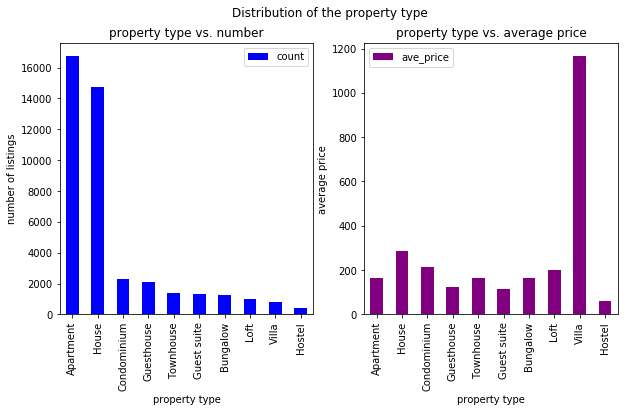

In [30]:
# the graph to describe Question 1
graph1 = df_type_price.head(10).reset_index()

fig,(ax0,ax1) = plt.subplots(nrows=1,ncols=2,figsize = (10,5))
fig.suptitle("Distribution of the property type")

# graph for ax0
graph1.plot(kind="bar", x = "property_type", y = "count", color = 'b',  ax = ax0)
ax0.set(title = "property type vs. number", xlabel="property type", ylabel="number of listings")
ax0.set_facecolor("white")
#graph for ax1
graph1.plot(kind="bar", x = "property_type", y = "ave_price", color = 'purple',  ax = ax1)
ax1.set(title = "property type vs. average price", xlabel="property type", ylabel="average price")
ax1.set_facecolor("white")

### For each types of room, which are the mainly property type of it in LA area?
**Question 2 Answer:**
* For entire home/apt, Apartment is most popular property type
* For shared room, House is most popular property type
* For private room, House is most popular property type

               count
property_type       
Apartment      11809                count
property_type       
House            895                count
property_type       
House           6903


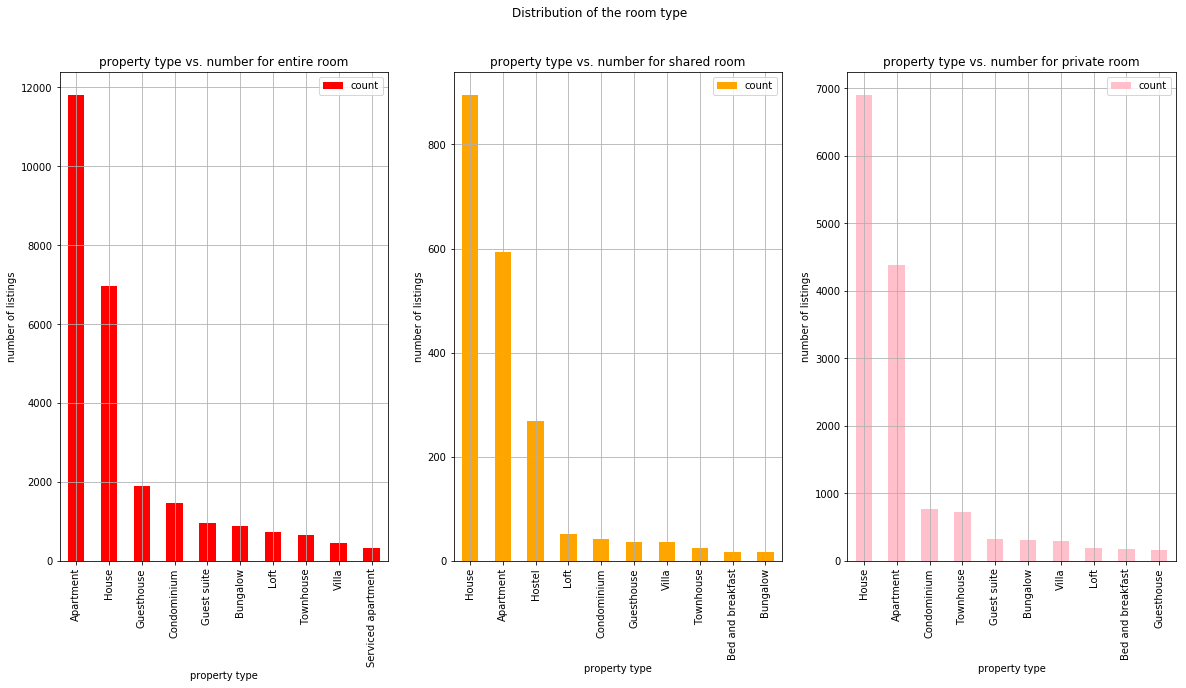

In [33]:
# Your code to answer Question 2
# show types of room
l=list(df_listing['room_type'].unique())

# create data frame that each property type has corresponding listing number when room type is 'entire house/apt'
entire=df_listing.loc[df_listing['room_type']==l[0],:].groupby(by='property_type').\
        apply(lambda x:pd.Series({'count':x['id'].nunique()})).sort_values(by='count',ascending=False)

# create data frame that each property type has corresponding listing number when room type is 'shared room'
shared=df_listing.loc[df_listing['room_type']==l[1],:].groupby(by='property_type').\
        apply(lambda x:pd.Series({'count':x['id'].nunique()})).sort_values(by='count',ascending=False)

# create data frame that each property type has corresponding listing number when room type is 'private room'
private=df_listing.loc[df_listing['room_type']==l[2],:].groupby(by='property_type').\
        apply(lambda x:pd.Series({'count':x['id'].nunique()})).sort_values(by='count',ascending=False)
print(entire.head(1),shared.head(1),private.head(1))

# the graph to describe Question 2
entire_graph = entire.head(10).reset_index()
shared_graph = shared.head(10).reset_index()
private_graph = private.head(10).reset_index()

fig,(ax0,ax1,ax2) = plt.subplots(nrows=1,ncols=3,figsize = (20,9))
fig.suptitle("Distribution of the room type")

# graph for ax0
entire_graph.plot(kind="bar", x = "property_type", y = "count", color = 'red',  ax = ax0)
ax0.set(title = "property type vs. number for entire room", xlabel="property type", ylabel="number of listings")
ax0.set_facecolor("white")
ax0.grid(True)
#graph for ax1
shared_graph.plot(kind="bar", x = "property_type", y = "count", color = 'orange',  ax = ax1)
ax1.set(title = "property type vs. number for shared room", xlabel="property type", ylabel="number of listings")
ax1.set_facecolor("white")
ax1.grid(True)
#graph for ax2
private_graph.plot(kind="bar", x = "property_type", y = "count", color = 'pink',  ax = ax2)
ax2.set(title = "property type vs. number for private room", xlabel="property type", ylabel="number of listings")
ax2.set_facecolor("white")
ax2.grid(True)


### For each types of room, what is the average minimum night of it and what is the average maximum night? Are there any differences between them?
**Question 3 Answer:**
* data frame 'df_min'

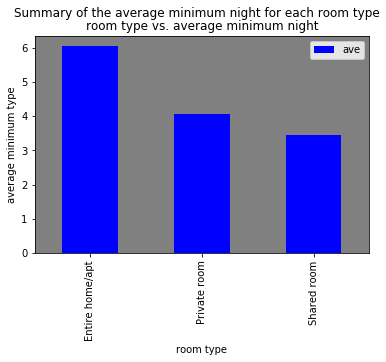

In [35]:
# Your code to answer Question 3

# create data frame that each room type has corresponding average minimum nights
df_min=df_listing.groupby(by='room_type').apply(lambda x:pd.Series({'ave':x['minimum_nights'].mean(),
                                                            'std':x['minimum_nights'].std()}))
df_min

# the graph to describe Question 3
graph3 = df_min.reset_index()

fig,ax = plt.subplots()
fig.suptitle("Summary of the average minimum night for each room type")

# graph
graph3.plot(kind="bar", x = "room_type", y = "ave", color = 'blue',ax=ax)
ax.set(title = "room type vs. average minimum night", xlabel="room type", ylabel="average minimum type")
ax.set_facecolor("gray")

### What is the top five cities have largest percentage of listings number in LA area, using cities that have at least 50 listings?
**Question 4 Answer:**
* Los Angeles, Long Beach, West Hollywood, Santa Monica, Beverly Hills

                percentage
city                      
Los Angeles      66.335615
Long Beach        3.544249
West Hollywood    2.491265
Santa Monica      2.254344
Beverly Hills     1.809218


([<matplotlib.patches.Wedge at 0x11a1fa518>,
 [Text(-1.00659,0.443598,'Los Angeles'),
  Text(0.852207,-0.695517,'Long Beach'),
  Text(0.996892,-0.464981,'West Hollywood'),
  Text(1.06811,-0.262948,'Santa Monica'),
  Text(1.09696,-0.0817227,'Beverly Hills')],
 [Text(-0.549048,0.241963,'86.79%'),
  Text(0.46484,-0.379373,'4.64%'),
  Text(0.543759,-0.253626,'3.26%'),
  Text(0.582605,-0.143426,'2.95%'),
  Text(0.598342,-0.044576,'2.37%')])

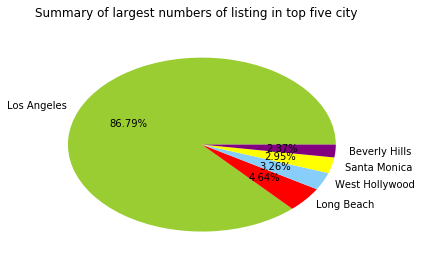

In [36]:
# Your code to answer Question 4
# create data frame that only includes cities with more than and equal to 50 listings
df_c=df_listing.groupby(by='city').filter(lambda x:x['id'].nunique()>=50)

# create data frame that each city has corresponding percentage of number of listings in LA area
df_city=df_c.groupby(by='city').\
    apply(lambda x:pd.Series({'percentage':(x['id'].nunique()/df_c.shape[0])*100})).\
    sort_values(by='percentage',ascending=False)

# top five cities that have largest percentage of listings number in LA area
print(df_city.head())

# the graph to describe Question 4
graph4 = [66.335615,3.544249,2.491265,2.254344,1.809218]

fig = plt.figure()
fig.suptitle("Summary of largest numbers of listing in top five city")

# graph
labels = ['Los Angeles','Long Beach','West Hollywood','Santa Monica','Beverly Hills']
size = [46,253,321,66,34]
colors = ['yellowgreen','red','lightskyblue','yellow','purple']
plt.pie(graph4,labels=labels,autopct='%1.2f%%',colors=colors) 



### For the top five cities which have largest percentage of listings number in LA area, which property type is the most popular in that city?
**Question 5 Answer:**
* Los Angeles: Apartment
* Long Beach: Apartment
* West Hollywood: Apartment
* Santa Monica: Apartment
* Beverly Hills: Apartment


               count_type
property_type            
Apartment           12317
House                8362
Guesthouse           1281
Condominium          1170                count_type
property_type            
Apartment             548
House                 464
Condominium           164
Guesthouse             62                count_type
property_type            
Apartment             579
House                 195
Condominium           132
Townhouse              27                count_type
property_type            
Apartment             516
House                 143
Condominium            64
Townhouse              56                count_type
property_type            
Apartment             339
House                 246
Villa                  53
Guesthouse             31
['Los Angeles', 'Long Beach', 'West Hollywood', 'Santa Monica', 'Beverly Hills']
[12317, 548, 579, 516, 339] [8362, 464, 195, 143, 246]


[Text(0,0,'Los Angeles'),
 Text(0,0,'Long Beach'),
 Text(0,0,'West Hollywood'),
 Text(0,0,'Santa Monica'),
 Text(0,0,'Beverly Hills')]

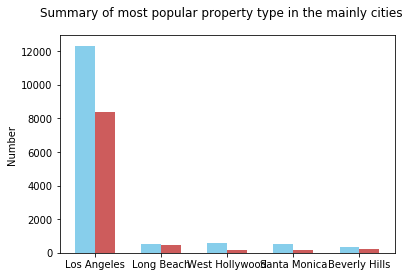

In [37]:
# Your code to answer Question 5
# list the top five cities that have largest percentage of listings number in LA area
l_top=list(df_city.reset_index().head()['city'])

# create data frame for each city(top five cities from question4)that each property type has corresponding the number of listings
d_LA=df_listing.loc[df_listing['city']==l_top[0],:].groupby(by='property_type').\
        apply(lambda x:pd.Series({'count_type':x['id'].nunique()})).sort_values(by='count_type',ascending=False)
d_LB=df_listing.loc[df_listing['city']==l_top[1],:].groupby(by='property_type').\
        apply(lambda x:pd.Series({'count_type':x['id'].nunique()})).sort_values(by='count_type',ascending=False)
d_WH=df_listing.loc[df_listing['city']==l_top[2],:].groupby(by='property_type').\
        apply(lambda x:pd.Series({'count_type':x['id'].nunique()})).sort_values(by='count_type',ascending=False)
d_SM=df_listing.loc[df_listing['city']==l_top[3],:].groupby(by='property_type').\
        apply(lambda x:pd.Series({'count_type':x['id'].nunique()})).sort_values(by='count_type',ascending=False)
d_BH=df_listing.loc[df_listing['city']==l_top[4],:].groupby(by='property_type').\
        apply(lambda x:pd.Series({'count_type':x['id'].nunique()})).sort_values(by='count_type',ascending=False)

# get the most popular property type for each city
print(d_LA.head(4),d_LB.head(4),d_WH.head(4),d_SM.head(4),d_BH.head(4))
print(l_top)

# the graph to describe Question 5
apartment = [12317,548,579,516,339]
house = [8362,464,195,143,246]
print(apartment,house)
fig,ax = plt.subplots()
fig.suptitle("Summary of most popular property type in the mainly cities")
ind = np.arange(5)
width = 0.3
ax.bar(ind - width/2, apartment, width,color='SkyBlue', label='apartment')
ax.bar(ind + width/2, house, width,color='indianred', label='house')
ax.set_ylabel('Number')
ax.set_xticks(ind)
ax.set_xticklabels(('Los Angeles', 'Long Beach', 'West Hollywood', 'Santa Monica', 'Beverly Hills'))



## Executive Summary
In Los Angeles, the top ten most popular property types from Airbnb are showed in question 1. Approximately there are 16780 apartments and 14769 houses could be found in Airbnb, and for guests, they can have far more choices in apartment and houses than other property type when they plan their trip to Los Angeles. The average price per day for the villa is the highest among all the property types. 

For three room types found in Los Angeles area, more entire rooms could be found in LA which are regards as the mainly type of room styles. Private rooms are more common in house and apartment than others. While there is less choice for guest who want to have a shared room. If someone plan to visit LA, he or she might mostly use Airbnb to choose to live in Los Angeles city. About 66% of properties posted on Airbnb locate in Los Angeles city. The minimum night rented for three types are slightly different. Averagely, entire house needs 6 days for minimum night, private room and shared room only needs about 4 days. 

For the graph we developed, there are several interesting aspects from the relationship in location, room type and property type. For the location, more listings locate in LA city. In this group of property, a large group of them are apartment with entire room. For the guest, most of them may choose to live someplace that are convenient for them to visit the city, and the properties locate in the city would be there first-choice. As the number of traveler growing in the future, the requirement for rooms are growing. However, the competitions between the host are more intensive. Hosts may need to improve the environment in order to attract the guests. This sometimes is a trade-off for the host.